In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras import *
from sklearn import *
from sklearn.preprocessing import StandardScaler

x = pd.read_csv('/Users/taraapple/Desktop/housing.csv').dropna()
y = x.pop('median_house_value')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [38]:
mapping = {'<1H OCEAN': 5, 'INLAND': 4,'ISLAND': 1,'NEAR BAY': 2,'NEAR OCEAN': 3}
x_train['ocean_proximity'] = x_train['ocean_proximity'].astype('category').map(mapping).astype('float')
x_test['ocean_proximity'] = x_test['ocean_proximity'].astype('category').map(mapping).astype('float')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.1)

In [40]:
inputs = layers.Input(shape=(9))
l = layers.Dense(16,activation='linear')(inputs)

for i in range(16):
    l = layers.Dense(16,activation='linear',kernel_regularizer=regularizers.l1(5e-1))(l)
    l = layers.Reshape((-1,1))(l)
    l = layers.MaxPooling1D(pool_size=4,strides=4)(l)
    l = layers.Flatten()(l)
    
l_ = layers.Dense(8,activation='linear',kernel_regularizer=regularizers.l1(5e-1))(l)
l_ = layers.Dropout(0.3)(l)
output = layers.Dense(1)(l)

l1model = Model(inputs=inputs, outputs=output)
l1model.compile(optimizer="SGD", loss="mse")

In [41]:
epochs = 10
l1model.fit(x_train, y_train, batch_size= 32,
          epochs=epochs,
          validation_data=(x_val,y_val),
          validation_batch_size=32,
          use_multiprocessing=True,
          workers=-1,
          verbose=0)

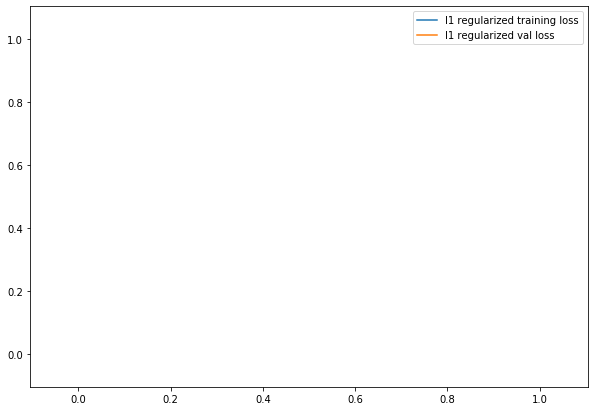

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(l1model.history.history['loss'],label = 'l1 regularized training loss')
plt.plot(l1model.history.history['val_loss'],label = 'l1 regularized val loss')
plt.legend()